# Capstone  
**Author:** Sundus Yawar  
**Student ID:** 583854  
**Institute:** BrainStation  
**Capstone Supervisor:** Amir Rahimizadeh

# Importing Data

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### Data dictionary for Fuel consumption rating data

In [198]:
 model = {
    "4WD/4X4": "Four-wheel drive",
    "AWD": "All-wheel drive",
    "FFV": "Flexible-fuel vehicle",
    "SWB": "Short wheelbase",
    "LWB": "Long wheelbase",
    "EWB": "Extended wheelbase"
 }

In [199]:
transmission = {
    "A": "Automatic",
    "AM": "Automated manual",
    "AS": "Automatic with select shift",
    "AV": "Continuously variable",
    "M": "Manual",
    "3 – 10": "Number of gears"
}

In [200]:
fuel_type = {
    "X": "Regular gasoline",
    "Z": "Premium gasoline",
    "D": "Diesel",
    "E": "Ethanol (E85)",
    "N": "Natural gas"
}

| Attribute         | Description                                                                             |
|:------------------|:----------------------------------------------------------------------------------------|
| Fuel Consumption  | City and highway fuel consumption ratings are shown in L/100 km and in mpg.           |
| CO2 Emissions     | Tailpipe emissions of carbon dioxide (g/km) for combined city and highway driving.     |
| CO2 Rating        | CO2 emissions rating on a scale from 1 (worst) to 10 (best).                             |
| Smog Rating       | Smog-forming pollutants emissions rating on a scale from 1 (worst) to 10 (best).        |


Initially, when I imported the data(just 1 file for testing purposes) it was showing many columns (empty columns), I did df.shape and it showed (1323,222) but I know that my dataset only has 15 columns.
I figured that it probably imported that way because I have heading in 2 rows where main heading is in 1st row and subheading is in 2nd row. When there is a subheading the first row is usually empty. This, confuses the import statement into thinking empty cell is considered as column which is why I had that problem. So, I decided to import just the actual data and then add the column headers later.

In [201]:
dataframes = {}
headers = ["Model_Year", "Make", "Model", "Vehicle_Class", "Engine_Size(L)", "Cylinders", "Transmission", "Fuel_Type", "Fuel_Consumption-City(L/100 km)", "Fuel_Consumption-Hwy(L/100 km)", "Fuel_Consumption-Comb(L/100 km)", "Fuel_Consumption-Comb(mpg)", "CO2_Emissions(g/km)", "CO2_Rating", "Smog_Rating"]
#I had to specify number of columns to import because it was importing empty columns too (221 columns rather than 15)
for year in range(2017, 2024):
    file_path = 'MY{} Fuel Consumption Ratings.csv'.format(year)
    dataframes[year] = pd.read_csv(file_path, header=None, skiprows=[0, 1], encoding='iso-8859-1', usecols=range(15))

In [202]:
for year in range(2017,2024):
    print(dataframes[year].head())

     0      1                 2            3    4   5    6  7     8     9     10  11   12  13  14
0  2017  ACURA               ILX      COMPACT  2.4   4  AM8  Z   9.4   6.8   8.2  34  192   7   6
1  2017  ACURA        MDX SH-AWD  SUV - SMALL  3.5   6  AS9  Z  12.6   9.0  11.0  26  259   4   6
2  2017  ACURA  MDX SH-AWD ELITE  SUV - SMALL  3.5   6  AS9  Z  12.2   9.0  10.7  26  251   5   6
3  2017  ACURA    MDX HYBRID AWD  SUV - SMALL  3.0   6  AM7  Z   9.1   9.0   9.0  31  210   6   6
4  2017  ACURA               NSX   TWO-SEATER  3.5   6  AM9  Z  11.1  10.8  11.0  26  261   4   6
     0      1                 2           3    4   5    6  7     8     9     10  11   12  13  14
0  2018  Acura               ILX     Compact  2.4   4  AM8  Z   9.4   6.8   8.2  34  192   6   3
1  2018  Acura        MDX SH-AWD  SUV: Small  3.5   6  AS9  Z  12.6   9.0  11.0  26  259   4   3
2  2018  Acura  MDX SH-AWD Elite  SUV: Small  3.5   6  AS9  Z  12.2   9.0  10.7  26  251   4   3
3  2018  Acura    MDX Hy

In [203]:
#vertically concatenate (aka stack) the data because it is same thing just for different model year
fuel_cons_rating = pd.concat([dataframes[2017],dataframes[2018],dataframes[2019],dataframes[2020],dataframes[2021],dataframes[2022],dataframes[2023]],axis=0)

In [204]:
#I am going to add the header now and reset index since multiple files were stacked
fuel_cons_rating.columns = headers
fuel_cons_rating.reset_index(drop=True, inplace=True)
fuel_cons_rating.head()

Model_Year   Make             Model Vehicle_Class  Engine_Size(L)  Cylinders Transmission Fuel_Type  Fuel_Consumption-City(L/100 km)  Fuel_Consumption-Hwy(L/100 km)  Fuel_Consumption-Comb(L/100 km)  Fuel_Consumption-Comb(mpg)  CO2_Emissions(g/km)  CO2_Rating  Smog_Rating
0        2017  ACURA               ILX       COMPACT             2.4          4          AM8         Z                              9.4                             6.8                              8.2                          34                  192           7            6
1        2017  ACURA        MDX SH-AWD   SUV - SMALL             3.5          6          AS9         Z                             12.6                             9.0                             11.0                          26                  259           4            6
2        2017  ACURA  MDX SH-AWD ELITE   SUV - SMALL             3.5          6          AS9         Z                             12.2                             9.0                             10.7                          26                  251           5            6
3        2017  ACURA    MDX HYBRID AWD   SUV - SMALL             3.0          6          AM7         Z                              9.1                             9.0                              9.0                          31                  210           6            6
4        2017  ACURA               NSX    TWO-SEATER             3.5          6          AM9         Z                             11.1                            10.8                             11.0                          26                  261           4            6

In [205]:
#sanity check to see if that worked or if it is still starting index from 0 every time the data is from new year
fuel_cons_rating.tail()

Model_Year   Make        Model  Vehicle_Class  Engine_Size(L)  Cylinders Transmission Fuel_Type  Fuel_Consumption-City(L/100 km)  Fuel_Consumption-Hwy(L/100 km)  Fuel_Consumption-Comb(L/100 km)  Fuel_Consumption-Comb(mpg)  CO2_Emissions(g/km)  CO2_Rating  Smog_Rating
6946        2023  Volvo  XC40 B5 AWD     SUV: Small             2.0          4          AS8         Z                             10.2                             7.9                              9.2                          31                  215           5            5
6947        2023  Volvo  XC60 B5 AWD     SUV: Small             2.0          4          AS8         Z                             10.3                             8.2                              9.4                          30                  218           5            5
6948        2023  Volvo  XC60 B6 AWD     SUV: Small             2.0          4          AS8         Z                             11.1                             8.7                             10.0                          28                  233           5            7
6949        2023  Volvo  XC90 B5 AWD  SUV: Standard             2.0          4          AS8         Z                             10.5                             8.4                              9.6                          29                  223           5            5
6950        2023  Volvo  XC90 B6 AWD  SUV: Standard             2.0          4          AS8         Z                             11.9                             9.1                             10.6                          27                  249           5            7

In [206]:
fuel_cons_rating.shape

(6951, 15)

This dataset has 6,951 rows and 15 columns

In [207]:
fuel_cons_rating.isna().sum()

Model_Year                         0
Make                               0
Model                              0
Vehicle_Class                      0
Engine_Size(L)                     0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption-City(L/100 km)    0
Fuel_Consumption-Hwy(L/100 km)     0
Fuel_Consumption-Comb(L/100 km)    0
Fuel_Consumption-Comb(mpg)         0
CO2_Emissions(g/km)                0
CO2_Rating                         0
Smog_Rating                        0
dtype: int64

Good news: There are no missing values in this dataset.

In [208]:
fuel_cons_rating.duplicated().sum()

0

There are no duplicate rows

In [209]:
fuel_cons_rating.T.duplicated()

Model_Year                         False
Make                               False
Model                              False
Vehicle_Class                      False
Engine_Size(L)                     False
Cylinders                          False
Transmission                       False
Fuel_Type                          False
Fuel_Consumption-City(L/100 km)    False
Fuel_Consumption-Hwy(L/100 km)     False
Fuel_Consumption-Comb(L/100 km)    False
Fuel_Consumption-Comb(mpg)         False
CO2_Emissions(g/km)                False
CO2_Rating                         False
Smog_Rating                        False
dtype: bool

There are no duplicate columns. But Fuel_Consumption-Comb(mpg) and Fuel_Consumption-Comb(L/100km) contain same info just in different units. So, I'll remove this column.

In [210]:
fuel_cons_rating.drop("Fuel_Consumption-Comb(mpg)", axis=1, inplace=True)

In [211]:
fuel_cons_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model_Year                       6951 non-null   int64  
 1   Make                             6951 non-null   object 
 2   Model                            6951 non-null   object 
 3   Vehicle_Class                    6951 non-null   object 
 4   Engine_Size(L)                   6951 non-null   float64
 5   Cylinders                        6951 non-null   int64  
 6   Transmission                     6951 non-null   object 
 7   Fuel_Type                        6951 non-null   object 
 8   Fuel_Consumption-City(L/100 km)  6951 non-null   float64
 9   Fuel_Consumption-Hwy(L/100 km)   6951 non-null   float64
 10  Fuel_Consumption-Comb(L/100 km)  6951 non-null   float64
 11  CO2_Emissions(g/km)              6951 non-null   int64  
 12  CO2_Rating          

All columns are in appropriate data type so no need to change anything in this regard here.

In [212]:
fuel_cons_rating.describe()

Model_Year  Engine_Size(L)    Cylinders  Fuel_Consumption-City(L/100 km)  Fuel_Consumption-Hwy(L/100 km)  Fuel_Consumption-Comb(L/100 km)  CO2_Emissions(g/km)   CO2_Rating  Smog_Rating
count  6951.000000     6951.000000  6951.000000                      6951.000000                     6951.000000                      6951.000000          6951.000000  6951.000000  6951.000000
mean   2019.859732        3.148281     5.635880                        12.446497                        9.169976                        10.971429           254.565242     4.549561     4.751259
std       1.976271        1.354349     1.908233                         3.396814                        2.165199                         2.798416            60.937480     1.595708     1.788972
min    2017.000000        0.900000     3.000000                         4.000000                        3.900000                         4.000000            94.000000     1.000000     1.000000
25%    2018.000000        2.000000     4.000000                        10.100000                        7.600000                         9.100000           211.000000     3.000000     3.000000
50%    2020.000000        3.000000     6.000000                        12.100000                        8.900000                        10.600000           250.000000     4.000000     5.000000
75%    2022.000000        3.700000     6.000000                        14.500000                       10.400000                        12.700000           293.000000     5.000000     6.000000
max    2023.000000        8.400000    16.000000                        30.300000                       20.900000                        26.100000           608.000000    10.000000     8.000000

In [213]:
#checking what kind of values are in categorical columns to see if I need to do any data cleaning
categorical_columns = fuel_cons_rating.select_dtypes(include=['object'])  # Select columns with object data type

# Loop through object columns and print unique values
for column in categorical_columns.columns:
    unique_values = fuel_cons_rating[column].unique()
    unique_values.sort()
    print(f"Column '{column}': {unique_values}")

Column 'Make': ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'Acura' 'Alfa Romeo'
 'Aston Martin' 'Audi' 'BENTLEY' 'BMW' 'BUICK' 'Bentley' 'Bugatti' 'Buick'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'Cadillac' 'Chevrolet' 'Chrysler'
 'DODGE' 'Dodge' 'FIAT' 'FORD' 'Ford' 'GENESIS' 'GMC' 'Genesis' 'HONDA'
 'HYUNDAI' 'Honda' 'Hyundai' 'INFINITI' 'Infiniti' 'JAGUAR' 'JEEP'
 'Jaguar' 'Jeep' 'KIA' 'Kia' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS' 'LINCOLN'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'MASERATI' 'MAZDA'
 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'Maserati' 'Mazda' 'Mercedes-Benz'
 'Mitsubishi' 'NISSAN' 'Nissan' 'PORSCHE' 'Porsche' 'RAM' 'ROLLS-ROYCE'
 'Ram' 'Rolls-Royce' 'SMART' 'SUBARU' 'Subaru' 'TOYOTA' 'Toyota'
 'VOLKSWAGEN' 'VOLVO' 'Volkswagen' 'Volvo']
Column 'Model': ['124 SPIDER' '124 Spider' '1500' ... 'Z' 'Z4 M40i' 'Z4 sDrive30i']
Column 'Vehicle_Class': ['COMPACT' 'Compact' 'FULL-SIZE' 'Full-size' 'MID-SIZE' 'MINICOMPACT'
 'MINIVAN' 'Mid-size' 'Minicompact' 'Minivan' 'PICKUP TRUCK - SMALL

It seems like there are some inconsistencies. For example, in Make column I have ACURA and Acura, in Model  have 124 SPIDER and 124 Spider. In Vehicle class I have COMPACT and Compact etc.
So, below I'll make it consistent 

In [214]:
fuel_cons_rating["Make"] = fuel_cons_rating["Make"].str.upper()
fuel_cons_rating["Model"] = fuel_cons_rating["Model"].str.upper()
fuel_cons_rating["Vehicle_Class"] = fuel_cons_rating["Vehicle_Class"].str.upper()

I also noticed that in Vehicle_CLass column I have same values but with eith ":" or "-" so I notice that all of them have the format type - size so i'll change to that.

In [215]:
fuel_cons_rating['Vehicle_Class'] = fuel_cons_rating['Vehicle_Class'].str.replace(':', ' -')

In [216]:
#sanity check to see if this resolved my issue above
for column in categorical_columns.columns:
    unique_values = fuel_cons_rating[column].unique()
    unique_values.sort()
    print(f"Column '{column}': {unique_values}")

Column 'Make': ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUGATTI'
 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GENESIS'
 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI'
 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI'
 'MITSUBISHI' 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SMART' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']
Column 'Model': ['124 SPIDER' '1500' '1500 4X4' ... 'Z' 'Z4 M40I' 'Z4 SDRIVE30I']
Column 'Vehicle_Class': ['COMPACT' 'FULL-SIZE' 'MID-SIZE' 'MINICOMPACT' 'MINIVAN'
 'PICKUP TRUCK - SMALL' 'PICKUP TRUCK - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'STATION WAGON - SMALL' 'SUBCOMPACT' 'SUV - SMALL' 'SUV - STANDARD'
 'TWO-SEATER' 'VAN - PASSENGER']
Column 'Transmission': ['A10' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'AM6' 'AM7' 'AM8' 'AM9' 'AS10' 'AS5'
 'AS6' 'AS7' 'AS8' 'AS9' 'AV' 'AV1' 'AV10' 'AV6' 'AV7' 'AV8' 'M5' 'M6'
 'M7']
Column 'Fuel_Type': ['D' 'E' 'X' 'Z']


## EDA for CO2 Ratings

In [217]:
fuel_cons_rating = fuel_cons_rating.sort_values(by='CO2_Rating')

# Create a boxplot using Plotly Express with 'CO2_Rating' as 'y'
fig = px.box(fuel_cons_rating, x='Vehicle_Class', y='CO2_Rating', title='Box Plot For CO2 Rating by Vehicle Class')
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Vehicle Class')
fig.update_yaxes(title_text='CO2 Rating')
# Show the plot
fig.show()

In [218]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['CO2_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by IQR and then by median in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=False)
print("Summary Stats for CO2 Ratings by Vehicle Class")
sorted_summary_stats

Summary Stats for CO2 Ratings by Vehicle Class


count      mean       std  min  25%  50%  75%   max  IQR
Vehicle_Class                                                                      
COMPACT                    713.0  5.678822  1.603827  1.0  5.0  6.0  7.0  10.0  2.0
STATION WAGON - SMALL      199.0  6.221106  1.352647  4.0  5.0  6.0  7.0  10.0  2.0
MID-SIZE                   939.0  5.376997  1.787347  1.0  4.0  5.0  7.0  10.0  3.0
STATION WAGON - MID-SIZE    61.0  4.278689  1.603446  1.0  3.0  5.0  5.0   9.0  2.0
MINICOMPACT                273.0  4.622711  1.137818  2.0  4.0  5.0  5.0   8.0  1.0
SPECIAL PURPOSE VEHICLE     77.0  4.662338  0.620068  3.0  4.0  5.0  5.0   6.0  1.0
SUBCOMPACT                 619.0  4.617124  1.287391  1.0  4.0  5.0  5.0   8.0  1.0
SUV - SMALL               1320.0  4.929545  0.995230  2.0  4.0  5.0  5.0   9.0  1.0
FULL-SIZE                  548.0  4.474453  1.866986  1.0  3.0  4.0  5.0  10.0  2.0
TWO-SEATER                 410.0  3.692683  1.525078  1.0  3.0  4.0  5.0   8.0  2.0
MINIVAN                     61.0  4.524590  0.993421  3.0  4.0  4.0  5.0   8.0  1.0
PICKUP TRUCK - SMALL       153.0  3.797386  0.737702  3.0  3.0  4.0  4.0   8.0  1.0
PICKUP TRUCK - STANDARD    687.0  3.312955  0.798792  1.0  3.0  3.0  4.0   5.0  1.0
SUV - STANDARD             872.0  3.330275  1.084745  1.0  3.0  3.0  4.0   8.0  1.0
VAN - PASSENGER             19.0  2.000000  0.666667  1.0  2.0  2.0  2.0   3.0  0.0

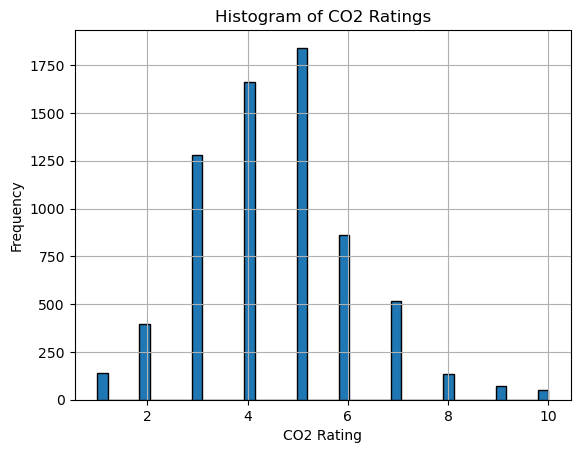

In [219]:
plt.hist( fuel_cons_rating['CO2_Rating'], bins="auto", edgecolor='k')  
plt.xlabel('CO2 Rating')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Ratings')
plt.grid(True)
plt.show()

The reason why I chose **median** is because it describes the central tendency of the data and is not influenced by the outliers like mean is. Because as you can see above CO2 Ratings aren't normally distributed.  
I chose **75%** because my focus is on which vehicle classes have more favourable CO2 Ratings i.e. near 10. Because 75% tells me that 25% of my data lies in the more favourable CO2 ratings region.  
I chose **IQR** because it represents variations in the dataset, low IQR value means lower variation in the dataset. Basically low IQR means that most of the vehicles in the class have values closer to the mean and mainly have favourable CO2 ratings. While high IQR would mean that vehicles in the class don't have a consistent CO2 rating, some have favourable CO2 ratings and some dont in the particular class.

In [220]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_classes = summary_stats.sort_values(by='rank', ascending=False).head(6)

print("Top Vehicle Classes with best CO2 Ratings: \n")
top_5_classes

Top Vehicle Classes with best CO2 Ratings: 



count      mean       std  min  25%  50%  75%   max  IQR  rank
Vehicle_Class                                                                           
COMPACT                   713.0  5.678822  1.603827  1.0  5.0  6.0  7.0  10.0  2.0  20.0
STATION WAGON - SMALL     199.0  6.221106  1.352647  4.0  5.0  6.0  7.0  10.0  2.0  20.0
MINICOMPACT               273.0  4.622711  1.137818  2.0  4.0  5.0  5.0   8.0  1.0  17.0
SPECIAL PURPOSE VEHICLE    77.0  4.662338  0.620068  3.0  4.0  5.0  5.0   6.0  1.0  17.0
SUBCOMPACT                619.0  4.617124  1.287391  1.0  4.0  5.0  5.0   8.0  1.0  17.0
SUV - SMALL              1320.0  4.929545  0.995230  2.0  4.0  5.0  5.0   9.0  1.0  17.0

### I want to know if make influences CO2 rating for each of the vehicle classes or they are all the same. Because in marketing I do hear things like we are more better in emissions. So I just want to explore this to see if this is a feature I'll need to add for training my machine learning model.

In [221]:
unique_classes = fuel_cons_rating['Vehicle_Class'].unique()

# Iterate through each unique vehicle class
for vehicle_class in unique_classes:
    # Filter the DataFrame for the current vehicle class
    filtered_df = fuel_cons_rating[fuel_cons_rating['Vehicle_Class'] == vehicle_class]

    # Create and display a box plot for the current vehicle class
    fig = px.box(filtered_df, x='Make', y='CO2_Rating', title=f'CO2 Rating Distribution by Make for {vehicle_class}')
    fig.update_xaxes(categoryorder='total ascending')
    fig.update_xaxes(title_text='Make')
    fig.update_yaxes(title_text='CO2 Rating')
    fig.show()

In [222]:

# Calculate summary statistics for each vehicle class by make
summary_stats = fuel_cons_rating.groupby(['Vehicle_Class', 'Make'])['CO2_Rating'].describe()

# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Define custom weights for ranking
weights = {'median': 2, '75%': 2, 'IQR': 3}

# Calculate rank based on custom weights
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Find the top combinations of Vehicle_Class and Make based on rank
top_combinations = summary_stats.sort_values(by='rank', ascending=False).groupby('Vehicle_Class').head(1)

# Display the top make for each of the vehicle classes
print("Top Makes for each of the Vehicle Classes for CO2 Ratings")
top_combinations.sort_values(by='Vehicle_Class')

Top Makes for each of the Vehicle Classes for CO2 Ratings


count      mean       std  min  25%  50%  75%   max  IQR  rank
Vehicle_Class            Make                                                                      
COMPACT                  MITSUBISHI   25.0  7.680000  1.029563  5.0  7.0  8.0  8.0   9.0  1.0  29.0
FULL-SIZE                HONDA        61.0  7.032787  1.277592  5.0  6.0  7.0  8.0  10.0  2.0  24.0
MID-SIZE                 HONDA        43.0  7.139535  1.319838  5.0  7.0  7.0  8.0  10.0  1.0  27.0
MINICOMPACT              FIAT         14.0  6.714286  0.611250  6.0  6.0  7.0  7.0   8.0  1.0  25.0
MINIVAN                  MAZDA         2.0  5.000000  0.000000  5.0  5.0  5.0  5.0   5.0  0.0  20.0
PICKUP TRUCK - SMALL     HYUNDAI       2.0  5.000000  0.000000  5.0  5.0  5.0  5.0   5.0  0.0  20.0
PICKUP TRUCK - STANDARD  HONDA         7.0  4.000000  0.000000  4.0  4.0  4.0  4.0   4.0  0.0  16.0
SPECIAL PURPOSE VEHICLE  NISSAN        5.0  5.000000  0.000000  5.0  5.0  5.0  5.0   5.0  0.0  20.0
STATION WAGON - MID-SIZE TOYOTA        2.0  9.000000  0.000000  9.0  9.0  9.0  9.0   9.0  0.0  36.0
STATION WAGON - SMALL    KIA          35.0  7.914286  1.738347  6.0  6.0  9.0  9.0  10.0  3.0  27.0
SUBCOMPACT               VOLKSWAGEN    5.0  6.000000  0.000000  6.0  6.0  6.0  6.0   6.0  0.0  24.0
SUV - SMALL              NISSAN       35.0  5.428571  0.948240  4.0  5.0  6.0  6.0   7.0  1.0  21.0
SUV - STANDARD           VOLVO        15.0  4.866667  0.351866  4.0  5.0  5.0  5.0   5.0  0.0  20.0
TWO-SEATER               SMART         1.0  8.000000       NaN  8.0  8.0  8.0  8.0   8.0  0.0  32.0
VAN - PASSENGER          FORD         15.0  2.266667  0.457738  2.0  2.0  2.0  2.5   3.0  0.5   7.5

### Result
It seems like make really does matter for CO2 ratings. As can be seen by the table above different Make have better CO2 Ratings for each of the different Vehicle classes. So, I'll include Make in the feature to train the machine learning model

In [223]:
# box plot for CO2 rating
fig = px.box(fuel_cons_rating, x=fuel_cons_rating["Make"], y=fuel_cons_rating["CO2_Rating"], title='Box Plot For CO2 Rating by Vehicle Class')
# Add x and y labels
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Make')
fig.update_yaxes(title_text='CO2 Rating')
# Show the plot
fig.show()

In [224]:
summary_stats = fuel_cons_rating.groupby('Make')['CO2_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by IQR and then by median in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=False)
pd.set_option('display.expand_frame_repr', False)
print("Summary Stats for CO2 Ratings by Make")
sorted_summary_stats

Summary Stats for CO2 Ratings by Make


count      mean       std  min  25%  50%  75%   max  IQR
Make                                                                   
SMART            1.0  8.000000       NaN  8.0  8.0  8.0  8.0   8.0  0.0
HONDA          212.0  6.504717  1.494057  4.0  5.0  7.0  7.0  10.0  2.0
MITSUBISHI      66.0  6.196970  1.416602  4.0  5.0  6.0  8.0   9.0  3.0
TOYOTA         335.0  5.898507  2.103995  1.0  4.0  6.0  7.0  10.0  3.0
FIAT            37.0  6.054054  0.911225  5.0  5.0  6.0  7.0   8.0  2.0
HYUNDAI        200.0  6.180000  1.581171  3.0  5.0  6.0  7.0  10.0  2.0
KIA            189.0  5.968254  1.666008  3.0  5.0  6.0  7.0  10.0  2.0
NISSAN         227.0  5.246696  1.484708  2.0  4.0  6.0  6.0   8.0  2.0
MAZDA          177.0  6.090395  0.732964  5.0  6.0  6.0  7.0   7.0  1.0
MINI           169.0  5.846154  0.755929  5.0  5.0  6.0  6.0   7.0  1.0
VOLKSWAGEN     139.0  5.625899  1.044470  3.0  5.0  6.0  6.0   8.0  1.0
ALFA ROMEO      46.0  4.934783  0.928611  3.0  4.0  5.0  6.0   6.0  2.0
LEXUS          180.0  5.000000  1.749701  1.0  4.0  5.0  6.0  10.0  2.0
ACURA           71.0  4.985915  0.783635  4.0  4.0  5.0  5.0   7.0  1.0
AUDI           276.0  4.550725  1.118912  2.0  4.0  5.0  5.0   7.0  1.0
BUICK           77.0  5.090909  0.876323  3.0  5.0  5.0  6.0   7.0  1.0
SUBARU         127.0  5.409449  0.937358  3.0  5.0  5.0  6.0   7.0  1.0
VOLVO          104.0  5.153846  0.412646  4.0  5.0  5.0  5.0   6.0  0.0
BMW            458.0  4.242358  1.214517  2.0  3.0  4.0  5.0   7.0  2.0
CHEVROLET      548.0  4.056569  1.562381  1.0  3.0  4.0  5.0  10.0  2.0
FORD           642.0  4.116822  1.346538  1.0  3.0  4.0  5.0   9.0  2.0
LINCOLN         78.0  4.205128  1.342212  2.0  3.0  4.0  5.0   9.0  2.0
MERCEDES-BENZ  458.0  4.043668  1.215443  1.0  3.0  4.0  5.0   9.0  2.0
CADILLAC       157.0  4.312102  0.904784  1.0  4.0  4.0  5.0   6.0  1.0
CHRYSLER        56.0  4.410714  0.733033  3.0  4.0  4.0  5.0   7.0  1.0
INFINITI        69.0  4.304348  1.033332  2.0  4.0  4.0  5.0   7.0  1.0
JAGUAR         139.0  4.395683  1.074195  3.0  4.0  4.0  5.0   7.0  1.0
JEEP           240.0  4.287500  0.987712  1.0  4.0  4.0  5.0   6.0  1.0
LAND ROVER     118.0  3.796610  0.842862  2.0  3.0  4.0  4.0   5.0  1.0
PORSCHE        378.0  4.087302  0.713862  2.0  4.0  4.0  5.0   5.0  1.0
RAM             97.0  3.546392  1.000215  1.0  3.0  4.0  4.0   5.0  1.0
GENESIS         51.0  3.980392  0.706829  3.0  3.5  4.0  4.0   5.0  0.5
ASTON MARTIN    38.0  3.078947  0.784360  1.0  3.0  3.0  4.0   4.0  1.0
DODGE          189.0  3.359788  0.932665  1.0  3.0  3.0  4.0   5.0  1.0
GMC            343.0  3.454810  0.919334  1.0  3.0  3.0  4.0   6.0  1.0
MASERATI        82.0  3.121951  0.759958  2.0  3.0  3.0  4.0   5.0  1.0
BENTLEY         50.0  2.260000  0.876216  1.0  2.0  2.0  3.0   4.0  1.0
LAMBORGHINI     58.0  1.603448  0.590559  1.0  1.0  2.0  2.0   3.0  1.0
ROLLS-ROYCE     57.0  1.263158  0.444262  1.0  1.0  1.0  2.0   2.0  1.0
BUGATTI         12.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0  0.0

In [225]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_Make = summary_stats.sort_values(by='rank', ascending=False).head(6)

print("These are the top 5 makes in terms of CO2 Ratings: \n")
top_5_Make

These are the top 5 makes in terms of CO2 Ratings: 



count      mean       std  min  25%  50%  75%   max  IQR  rank
Make                                                                      
SMART         1.0  8.000000       NaN  8.0  8.0  8.0  8.0   8.0  0.0  32.0
MAZDA       177.0  6.090395  0.732964  5.0  6.0  6.0  7.0   7.0  1.0  23.0
HONDA       212.0  6.504717  1.494057  4.0  5.0  7.0  7.0  10.0  2.0  22.0
VOLKSWAGEN  139.0  5.625899  1.044470  3.0  5.0  6.0  6.0   8.0  1.0  21.0
MINI        169.0  5.846154  0.755929  5.0  5.0  6.0  6.0   7.0  1.0  21.0
VOLVO       104.0  5.153846  0.412646  4.0  5.0  5.0  5.0   6.0  0.0  20.0

## EDA for Smog Ratings

In [226]:
fuel_cons_rating = fuel_cons_rating.sort_values(by='Smog_Rating')

# Create a boxplot using Plotly Express with 'CO2_Rating' as 'y'
fig = px.box(fuel_cons_rating, x='Vehicle_Class', y='Smog_Rating', title='Box Plot For Smog Rating by Vehicle Class')
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Vehicle Class')
fig.update_yaxes(title_text='Smog Rating')
# Show the plot
fig.show()

In [227]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['Smog_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by median and then by IQR in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=False)
print("Summary Stats for Smog Rating by Vehicle Class")
sorted_summary_stats

Summary Stats for Smog Rating by Vehicle Class


count      mean       std  min  25%  50%  75%  max  IQR
Vehicle_Class                                                                     
STATION WAGON - SMALL      199.0  5.618090  1.419516  1.0  5.0  6.0  7.0  8.0  2.0
MID-SIZE                   939.0  4.980831  1.921613  1.0  3.0  5.0  7.0  8.0  4.0
MINICOMPACT                273.0  3.710623  2.136981  1.0  1.0  5.0  5.0  8.0  4.0
COMPACT                    713.0  5.092567  1.685151  1.0  3.0  5.0  6.0  8.0  3.0
FULL-SIZE                  548.0  4.324818  1.727391  1.0  3.0  5.0  6.0  8.0  3.0
PICKUP TRUCK - STANDARD    687.0  4.538574  1.487914  1.0  3.0  5.0  6.0  7.0  3.0
STATION WAGON - MID-SIZE    61.0  4.918033  1.369855  3.0  3.0  5.0  6.0  8.0  3.0
SUBCOMPACT                 619.0  4.840065  1.691003  1.0  3.0  5.0  6.0  8.0  3.0
SUV - STANDARD             872.0  4.330275  1.642881  1.0  3.0  5.0  6.0  8.0  3.0
MINIVAN                     61.0  5.344262  1.470660  3.0  5.0  5.0  7.0  7.0  2.0
SUV - SMALL               1320.0  5.401515  1.435813  1.0  5.0  5.0  7.0  8.0  2.0
PICKUP TRUCK - SMALL       153.0  5.098039  1.316718  3.0  5.0  5.0  6.0  7.0  1.0
SPECIAL PURPOSE VEHICLE     77.0  5.012987  1.019462  3.0  5.0  5.0  6.0  6.0  1.0
TWO-SEATER                 410.0  3.363415  2.243628  1.0  1.0  3.0  5.0  8.0  4.0
VAN - PASSENGER             19.0  1.368421  0.495595  1.0  1.0  1.0  2.0  2.0  1.0

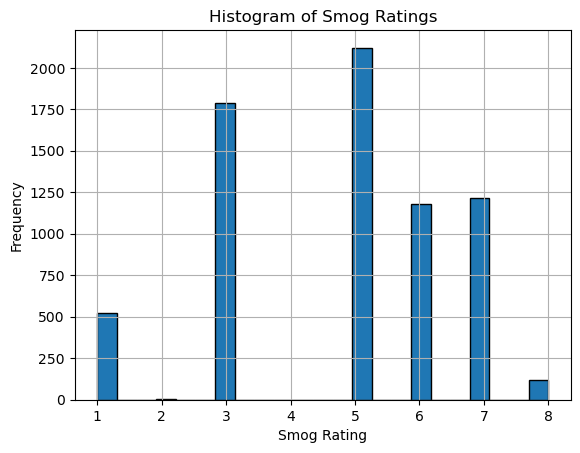

In [228]:
plt.hist( fuel_cons_rating['Smog_Rating'], bins="auto", edgecolor='k') 
plt.xlabel('Smog Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Smog Ratings')
plt.grid(True)
plt.show()

The reason why I chose **median** is because it describes the central tendency of the data and is not influenced by the outliers like mean is. Because as you can see above Smog Ratings aren't normally distributed.  
I chose **75%** because my focus is on which vehicle classes have more favourable Smog Ratings i.e. near 10. Because 75% tells me that 25% of my data lies in the more favourable Smog ratings region.  
I chose **IQR** because it represents variations in the dataset, low IQR value means lower variation in the dataset. Basically low IQR means that most of the vehicles in the class have values closer to the mean and mainly have favourable Smog ratings. While high IQR would mean that vehicles in the class don't have a consistent Smog rating, some have favourable Smog ratings and some dont in the particular class.

In [229]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_classes = summary_stats.sort_values(by='rank', ascending=False).head(6)

print("Top 5 Vehicle Classes in terms of Smog Rating")
top_5_classes

Top 5 Vehicle Classes in terms of Smog Rating


count      mean       std  min  25%  50%  75%  max  IQR  rank
Vehicle_Class                                                                          
STATION WAGON - SMALL     199.0  5.618090  1.419516  1.0  5.0  6.0  7.0  8.0  2.0  20.0
PICKUP TRUCK - SMALL      153.0  5.098039  1.316718  3.0  5.0  5.0  6.0  7.0  1.0  19.0
SPECIAL PURPOSE VEHICLE    77.0  5.012987  1.019462  3.0  5.0  5.0  6.0  6.0  1.0  19.0
MINIVAN                    61.0  5.344262  1.470660  3.0  5.0  5.0  7.0  7.0  2.0  18.0
SUV - SMALL              1320.0  5.401515  1.435813  1.0  5.0  5.0  7.0  8.0  2.0  18.0
COMPACT                   713.0  5.092567  1.685151  1.0  3.0  5.0  6.0  8.0  3.0  13.0

### I want to know if make influences Smog rating for each of the vehicle classes or they are all the same. Because in marketing I do hear things like we are more better in emissions I just want to explore if it is true. So I just want to explore this to see if this is a feature I'll need to add for training my machine learning model.

In [230]:
unique_classes = fuel_cons_rating['Vehicle_Class'].unique()

# Iterate through each unique vehicle class
for vehicle_class in unique_classes:
    # Filter the DataFrame for the current vehicle class
    filtered_df = fuel_cons_rating[fuel_cons_rating['Vehicle_Class'] == vehicle_class]

    # Create and display a box plot for the current vehicle class
    fig = px.box(filtered_df, x='Make', y='Smog_Rating', title=f'Smog Rating Distribution by Make for {vehicle_class}')
    fig.update_xaxes(categoryorder='total ascending')
    fig.update_xaxes(title_text='Make')
    fig.update_yaxes(title_text='Smog Rating')
    fig.show()

In [231]:

# Calculate summary statistics for each vehicle class by make
summary_stats = fuel_cons_rating.groupby(['Vehicle_Class', 'Make'])['Smog_Rating'].describe()

# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Define custom weights for ranking
weights = {'median': 2, '75%': 2, 'IQR': 3}

# Calculate rank based on custom weights
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Find the top 5 combinations of Vehicle_Class and Make based on rank
top_combinations = summary_stats.sort_values(by='rank', ascending=False).groupby('Vehicle_Class').head(1)

# Display the top make for each of the vehicle classes
print("Top Make for each Vehicle Class in terms of Smog Rating: \n")
top_combinations.sort_values(by='Vehicle_Class')

Top Make for each Vehicle Class in terms of Smog Rating: 



count      mean       std  min   25%  50%   75%  max   IQR   rank
Vehicle_Class            Make                                                                            
COMPACT                  VOLKSWAGEN      64.0  6.687500  1.206793  3.0  7.00  7.0  7.00  8.0  0.00  28.00
FULL-SIZE                ACURA            3.0  6.666667  0.577350  6.0  6.50  7.0  7.00  7.0  0.50  26.50
MID-SIZE                 JAGUAR          18.0  6.277778  1.994273  1.0  7.00  7.0  7.00  8.0  0.00  28.00
MINICOMPACT              MINI            36.0  6.611111  1.358103  3.0  7.00  7.0  7.00  8.0  0.00  28.00
MINIVAN                  MAZDA            2.0  6.000000  0.000000  6.0  6.00  6.0  6.00  6.0  0.00  24.00
PICKUP TRUCK - SMALL     FORD             5.0  6.000000  0.707107  5.0  6.00  6.0  6.00  7.0  0.00  24.00
PICKUP TRUCK - STANDARD  TOYOTA          24.0  4.833333  0.564660  3.0  5.00  5.0  5.00  5.0  0.00  20.00
SPECIAL PURPOSE VEHICLE  MERCEDES-BENZ   19.0  5.315789  0.477567  5.0  5.00  5.0  6.00  6.0  1.00  19.00
STATION WAGON - MID-SIZE TOYOTA           2.0  7.500000  0.707107  7.0  7.25  7.5  7.75  8.0  0.50  29.00
STATION WAGON - SMALL    VOLKSWAGEN      16.0  7.250000  0.447214  7.0  7.00  7.0  7.25  8.0  0.25  27.75
SUBCOMPACT               VOLKSWAGEN       5.0  7.200000  0.447214  7.0  7.00  7.0  7.00  8.0  0.00  28.00
SUV - SMALL              JAGUAR          30.0  6.100000  1.971346  1.0  7.00  7.0  7.00  8.0  0.00  28.00
SUV - STANDARD           HONDA            3.0  7.000000  0.000000  7.0  7.00  7.0  7.00  7.0  0.00  28.00
TWO-SEATER               BMW              9.0  6.111111  1.054093  5.0  5.00  7.0  7.00  7.0  2.00  22.00
VAN - PASSENGER          CHEVROLET        2.0  2.000000  0.000000  2.0  2.00  2.0  2.00  2.0  0.00   8.00

### Result
It seems like make really does matter for Smog ratings. As can be seen by the table above different Make have better Smog Ratings for each of the different Vehicle classes. So, I'll include Make in the feature to train the machine learning model.

In [232]:
# box plot for CO2 rating
fig = px.box(fuel_cons_rating, x=fuel_cons_rating["Make"], y=fuel_cons_rating["Smog_Rating"], title='Box Plot For Smog Rating by Vehicle Class')
# Add x and y labels
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Make')
fig.update_yaxes(title_text='Smog Rating')
# Show the plot
fig.show()

In [233]:
summary_stats = fuel_cons_rating.groupby('Make')['Smog_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by IQR and then by median in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=False)
pd.set_option('display.expand_frame_repr', False)
sorted_summary_stats

count      mean       std  min  25%  50%   75%  max   IQR
Make                                                                    
LAND ROVER     118.0  5.550847  2.170499  1.0  3.0  7.0  7.00  8.0  4.00
MAZDA          177.0  5.790960  1.792132  1.0  3.0  7.0  7.00  8.0  4.00
JAGUAR         139.0  5.985612  1.992688  1.0  5.0  7.0  7.00  8.0  2.00
VOLKSWAGEN     139.0  6.244604  1.531513  3.0  5.0  7.0  7.00  8.0  2.00
MINI           169.0  6.266272  1.670860  3.0  6.0  7.0  7.00  8.0  1.00
FIAT            37.0  4.756757  1.570658  3.0  3.0  6.0  6.00  7.0  3.00
SUBARU         127.0  4.677165  2.145064  1.0  3.0  6.0  6.00  7.0  3.00
BUICK           77.0  5.610390  1.148865  3.0  5.0  6.0  7.00  7.0  2.00
TOYOTA         335.0  5.629851  1.439500  1.0  5.0  6.0  7.00  8.0  2.00
CADILLAC       157.0  5.343949  1.289570  1.0  5.0  6.0  6.00  7.0  1.00
HONDA          212.0  4.966981  1.734469  3.0  3.0  5.0  7.00  8.0  4.00
NISSAN         227.0  5.189427  1.635955  1.0  3.0  5.0  7.00  8.0  4.00
ACURA           71.0  4.746479  1.653726  3.0  3.0  5.0  6.00  8.0  3.00
CHEVROLET      548.0  4.666058  1.630316  1.0  3.0  5.0  6.00  7.0  3.00
CHRYSLER        56.0  4.696429  1.725948  1.0  3.0  5.0  6.00  7.0  3.00
GMC            343.0  4.658892  1.429729  1.0  3.0  5.0  6.00  7.0  3.00
AUDI           276.0  4.590580  1.638997  1.0  3.0  5.0  5.00  8.0  2.00
GENESIS         51.0  4.352941  1.110379  3.0  3.0  5.0  5.00  7.0  2.00
LEXUS          180.0  5.500000  1.334962  3.0  5.0  5.0  7.00  8.0  2.00
VOLVO          104.0  5.528846  1.230334  1.0  5.0  5.0  7.00  7.0  2.00
HYUNDAI        200.0  5.240000  1.345904  3.0  5.0  5.0  6.25  8.0  1.25
FORD           642.0  4.850467  1.454266  1.0  5.0  5.0  6.00  8.0  1.00
JEEP           240.0  4.758333  1.754830  1.0  5.0  5.0  6.00  7.0  1.00
KIA            189.0  5.126984  1.393282  3.0  5.0  5.0  6.00  8.0  1.00
LINCOLN         78.0  5.282051  1.183188  3.0  5.0  5.0  6.00  8.0  1.00
MERCEDES-BENZ  458.0  4.794760  1.040438  1.0  5.0  5.0  5.00  7.0  0.00
MITSUBISHI      66.0  5.333333  0.730297  5.0  5.0  5.0  5.00  7.0  0.00
SMART            1.0  5.000000       NaN  5.0  5.0  5.0  5.00  5.0  0.00
DODGE          189.0  2.878307  1.856846  1.0  1.0  3.0  5.00  7.0  4.00
PORSCHE        378.0  3.158730  1.858721  1.0  1.0  3.0  5.00  5.0  4.00
BMW            458.0  4.447598  1.741024  1.0  3.0  3.0  6.00  8.0  3.00
INFINITI        69.0  4.130435  1.444188  3.0  3.0  3.0  6.00  7.0  3.00
ASTON MARTIN    38.0  3.763158  1.172528  3.0  3.0  3.0  5.00  6.0  2.00
RAM             97.0  3.845361  1.740092  1.0  3.0  3.0  5.00  7.0  2.00
ALFA ROMEO      46.0  3.326087  1.350792  1.0  3.0  3.0  3.00  7.0  0.00
BENTLEY         50.0  3.200000  1.261680  1.0  3.0  3.0  3.00  6.0  0.00
ROLLS-ROYCE     57.0  3.421053  1.051315  3.0  3.0  3.0  3.00  6.0  0.00
MASERATI        82.0  2.341463  1.573072  1.0  1.0  1.0  3.00  5.0  2.00
BUGATTI         12.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0  0.00
LAMBORGHINI     58.0  1.620690  1.308911  1.0  1.0  1.0  1.00  5.0  0.00

In [234]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_Make = summary_stats.sort_values(by='rank', ascending=False).head(6)

print("These are the top 5 makes in terms of Smog Ratings: \n")
top_5_Make

These are the top 5 makes in terms of Smog Ratings: 



count      mean       std  min  25%  50%  75%  max  IQR  rank
Make                                                                     
MINI        169.0  6.266272  1.670860  3.0  6.0  7.0  7.0  8.0  1.0  25.0
VOLKSWAGEN  139.0  6.244604  1.531513  3.0  5.0  7.0  7.0  8.0  2.0  22.0
JAGUAR      139.0  5.985612  1.992688  1.0  5.0  7.0  7.0  8.0  2.0  22.0
CADILLAC    157.0  5.343949  1.289570  1.0  5.0  6.0  6.0  7.0  1.0  21.0
TOYOTA      335.0  5.629851  1.439500  1.0  5.0  6.0  7.0  8.0  2.0  20.0
SMART         1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0  0.0  20.0

## EDA for Combined Fuel Consumption Ratings

In [235]:
fuel_cons_rating = fuel_cons_rating.sort_values(by='Fuel_Consumption-Comb(L/100 km)')

# Create a boxplot using Plotly Express with 'CO2_Rating' as 'y'
fig = px.box(fuel_cons_rating, x='Vehicle_Class', y='Fuel_Consumption-Comb(L/100 km)', title='Box Plot For Fuel_Consumption-Comb(L/100 km) by Vehicle Class')
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Vehicle Class')
fig.update_yaxes(title_text='Fuel_Consumption-Comb(L/100 km)')
# Show the plot
fig.show()

In [236]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['Fuel_Consumption-Comb(L/100 km)'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by IQR and then by median in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=True)
pd.set_option('display.expand_frame_repr', False)
print("Summary Stats for Fuel_Consumption-Comb(L/100 km) by Vehicle Class")
sorted_summary_stats

Summary Stats for Fuel_Consumption-Comb(L/100 km) by Vehicle Class


count       mean       std   min    25%   50%    75%   max  IQR
Vehicle_Class                                                                             
STATION WAGON - SMALL      199.0   8.240201  1.411494   4.4   7.80   8.4   9.20  11.9  1.4
COMPACT                    713.0   9.190884  2.218288   4.5   7.60   8.7  10.30  17.4  2.7
MID-SIZE                   939.0   9.619489  2.572342   4.4   7.80   9.2  11.00  20.0  3.2
SUV - SMALL               1320.0   9.981970  1.596611   5.6   9.00   9.9  10.90  16.5  1.9
STATION WAGON - MID-SIZE    61.0  11.226230  2.645304   5.8   9.60  10.2  12.70  16.6  3.1
SUBCOMPACT                 619.0  10.635057  2.055811   6.8   9.10  10.4  12.10  16.7  3.0
MINICOMPACT                273.0  10.696337  1.841611   7.0   9.60  10.5  11.70  17.0  2.1
SPECIAL PURPOSE VEHICLE     77.0  10.772727  1.477252   9.2   9.40  10.6  11.60  14.7  2.2
MINIVAN                     61.0  10.924590  1.969827   6.5  10.60  10.8  11.70  16.7  1.1
FULL-SIZE                  548.0  11.156934  2.883345   4.0   9.10  11.5  12.90  17.1  3.8
PICKUP TRUCK - SMALL       153.0  11.609150  1.275547   6.3  10.80  11.7  12.20  14.3  1.4
TWO-SEATER                 410.0  12.686098  3.702042   6.7  10.40  11.8  14.20  26.1  3.8
SUV - STANDARD             872.0  13.155734  2.306052   6.7  11.40  13.2  14.60  21.7  3.2
PICKUP TRUCK - STANDARD    687.0  13.523581  2.418647   8.8  11.80  13.3  14.80  21.5  3.0
VAN - PASSENGER             19.0  16.984211  2.370950  14.5  14.85  15.2  19.05  20.9  4.2

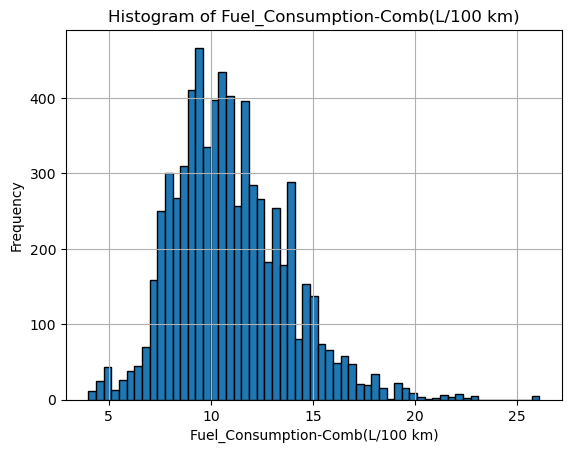

In [237]:
plt.hist( fuel_cons_rating['Fuel_Consumption-Comb(L/100 km)'], bins="auto", edgecolor='k') 
plt.xlabel('Fuel_Consumption-Comb(L/100 km)')
plt.ylabel('Frequency')
plt.title('Histogram of Fuel_Consumption-Comb(L/100 km)')
plt.grid(True)
plt.show()

The reason why I chose **median** is because it describes the central tendency of the data and is not influenced by the outliers like mean is. Because as you can see above Fuel_Consumption-Comb(L/100 km) aren't normally distributed.  
I chose **25%** because my focus is on which vehicle classes have more favourable Fuel_Consumption-Comb(L/100 km) i.e. lower fuel consumption. 
I chose **IQR** because it represents variations in the dataset, low IQR value means lower variation in the dataset. Basically low IQR means that most of the vehicles in the class have values closer to the mean and mainly have favourable Fuel_Consumption-Comb(L/100 km). While high IQR would mean that vehicles in the class don't have a consistent Fuel_Consumption-Comb(L/100 km), some have low Fuel_Consumption-Comb(L/100 km) and some dont in the particular class.

In [238]:
weights = {'median': 2, '25%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['25%'] * weights['25%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_classes = summary_stats.sort_values(by='rank', ascending=True).head(6)

print("Top 5 Vehicle Classes in terms of Fuel_Consumption-Comb(L/100 km)")
top_5_classes

Top 5 Vehicle Classes in terms of Fuel_Consumption-Comb(L/100 km)


count       mean       std  min  25%   50%   75%   max  IQR  rank
Vehicle_Class                                                                              
MID-SIZE                  939.0   9.619489  2.572342  4.4  7.8   9.2  11.0  20.0  3.2  24.4
COMPACT                   713.0   9.190884  2.218288  4.5  7.6   8.7  10.3  17.4  2.7  24.5
STATION WAGON - SMALL     199.0   8.240201  1.411494  4.4  7.8   8.4   9.2  11.9  1.4  28.2
FULL-SIZE                 548.0  11.156934  2.883345  4.0  9.1  11.5  12.9  17.1  3.8  29.8
SUBCOMPACT                619.0  10.635057  2.055811  6.8  9.1  10.4  12.1  16.7  3.0  30.0
STATION WAGON - MID-SIZE   61.0  11.226230  2.645304  5.8  9.6  10.2  12.7  16.6  3.1  30.3

### I want to know if Make influences Fuel_Consumption-Comb(L/100 km) for each of the vehicle classes or they are all the same. Because in marketing I do hear things like we are more fuel efficient, I just want to explore if it is true. So I just want to explore this to see if this is a feature I'll need to add for training my machine learning model.

In [239]:
unique_classes = fuel_cons_rating['Vehicle_Class'].unique()

# Iterate through each unique vehicle class
for vehicle_class in unique_classes:
    # Filter the DataFrame for the current vehicle class
    filtered_df = fuel_cons_rating[fuel_cons_rating['Vehicle_Class'] == vehicle_class]

    # Create and display a box plot for the current vehicle class
    fig = px.box(filtered_df, x='Make', y='Fuel_Consumption-Comb(L/100 km)', title=f'Fuel_Consumption-Comb(L/100 km) Distribution by Make for {vehicle_class}')
    fig.update_xaxes(categoryorder='total ascending')
    fig.update_xaxes(title_text='Make')
    fig.update_yaxes(title_text='Fuel_Consumption-Comb(L/100 km)')
    fig.show()

In [240]:

# Calculate summary statistics for each vehicle class by make
summary_stats = fuel_cons_rating.groupby(['Vehicle_Class', 'Make'])['Fuel_Consumption-Comb(L/100 km)'].describe()

# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Define custom weights for ranking
weights = {'median': 2, '25%': 2, 'IQR': 3}

# Calculate rank based on custom weights
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['25%'] * weights['25%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Find the top 5 combinations of Vehicle_Class and Make based on rank
top_combinations = summary_stats.sort_values(by='rank', ascending=True).groupby('Vehicle_Class').head(1)

# Display the top make for each of the vehicle classes
print("Top Make for each Vehicle Class in terms of Fuel Efficiency: \n")
top_combinations.sort_values(by='Vehicle_Class')

Top Make for each Vehicle Class in terms of Fuel Efficiency: 



count       mean       std   min    25%    50%     75%   max    IQR    rank
Vehicle_Class            Make                                                                                      
COMPACT                  MITSUBISHI      25.0   6.852000  1.015759   6.0   6.20   6.50   6.600   9.3  0.400  24.200
FULL-SIZE                HYUNDAI         47.0   7.068085  2.017220   4.0   4.70   7.90   8.700   9.6  4.000  13.200
MID-SIZE                 TOYOTA          88.0   7.190909  1.661784   4.4   5.10   7.50   8.400   9.7  3.300  15.300
MINICOMPACT              MERCEDES-BENZ    5.0  11.180000  3.425931   8.2   8.70   9.20  14.500  15.3  5.800  18.400
MINIVAN                  TOYOTA          14.0   9.300000  2.417882   6.5   6.70  10.85  11.525  11.7  4.825  20.625
PICKUP TRUCK - SMALL     FORD             5.0   8.620000  2.140561   6.3   6.40   9.60   9.800  11.0  3.400  21.800
PICKUP TRUCK - STANDARD  JEEP            14.0  11.357143  1.316589   9.8  10.00  12.30  12.525  12.6  2.525  37.025
SPECIAL PURPOSE VEHICLE  FORD            42.0  10.792857  1.745851   9.2   9.30  10.60  12.500  14.7  3.200  30.200
STATION WAGON - MID-SIZE TOYOTA           2.0   5.800000  0.000000   5.8   5.80   5.80   5.800   5.8  0.000  23.200
STATION WAGON - SMALL    KIA             35.0   6.408571  1.810650   4.4   4.75   5.40   8.500   8.8  3.750   9.050
SUBCOMPACT               MINI            66.0   8.136364  0.612093   7.3   7.50   7.90   8.800   9.3  1.300  26.900
SUV - SMALL              BMW             61.0  10.863934  2.133154   8.0   9.30  10.10  13.900  14.6  4.600  25.000
SUV - STANDARD           TOYOTA          41.0  11.543902  3.274527   6.7   8.30  11.70  13.800  16.5  5.500  23.500
TWO-SEATER               SMART            1.0   6.700000       NaN   6.7   6.70   6.70   6.700   6.7  0.000  26.800
VAN - PASSENGER          FORD            15.0  16.500000  2.454151  14.5  14.70  15.10  19.200  20.9  4.500  46.100

### Result
It seems like make really does matter for Fuel_Consumption-Comb(L/100 km). As can be seen by the table above different Make have better Fuel_Consumption-Comb(L/100 km) for each of the different Vehicle classes. So, I'll include Make in the feature to train the machine learning model.

In [241]:
# box plot for Fuel_Consumption-Comb(L/100 km) rating
fig = px.box(fuel_cons_rating, x=fuel_cons_rating["Make"], y=fuel_cons_rating["Fuel_Consumption-Comb(L/100 km)"], title='Box Plot For Fuel_Consumption-Comb(L/100 km) by Vehicle Class')
# Add x and y labels
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Make')
fig.update_yaxes(title_text='Fuel_Consumption-Comb(L/100 km)')
# Show the plot
fig.show()

In [242]:
summary_stats = fuel_cons_rating.groupby('Make')['Fuel_Consumption-Comb(L/100 km)'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Sort the DataFrame by median and then by IQR in descending order
sorted_summary_stats = summary_stats.sort_values(by=['50%', 'IQR'], ascending=True)
sorted_summary_stats

count       mean       std   min     25%    50%     75%   max    IQR
Make                                                                               
SMART            1.0   6.700000       NaN   6.7   6.700   6.70   6.700   6.7  0.000
HONDA          212.0   8.099528  1.667205   4.9   7.175   7.70   9.025  11.8  1.850
MAZDA          177.0   8.386441  0.739039   7.5   7.800   8.10   8.800  10.5  1.000
TOYOTA         335.0   8.999104  2.930712   4.4   6.900   8.20  10.900  16.5  4.000
HYUNDAI        200.0   8.326000  1.883204   4.0   7.500   8.35   9.525  12.6  2.025
FIAT            37.0   8.505405  0.712564   7.0   7.900   8.40   9.100   9.7  1.200
KIA            189.0   8.640212  2.071558   4.4   7.500   8.60  10.200  13.3  2.700
MINI           169.0   8.529586  0.697666   7.3   7.900   8.70   9.100   9.9  1.200
VOLKSWAGEN     139.0   9.051799  1.408121   6.8   8.200   8.70   9.800  12.9  1.600
NISSAN         227.0   9.712775  2.255311   6.7   8.000   8.70  11.400  15.5  3.400
MITSUBISHI      66.0   8.325758  1.373968   6.0   6.525   8.90   9.300  10.6  2.775
SUBARU         127.0   9.261417  1.300552   7.4   8.200   9.00  10.100  12.8  1.900
ALFA ROMEO      46.0   9.871739  1.419493   8.4   8.700   9.30  11.600  12.4  2.900
VOLVO          104.0   9.478846  0.613865   8.0   9.200   9.40   9.900  10.8  0.700
BUICK           77.0   9.619481  1.324867   7.8   8.600   9.50  10.600  13.7  2.000
ACURA           71.0   9.883099  1.152387   7.2   8.900   9.90  11.000  12.4  2.100
LEXUS          180.0  10.038333  2.422918   5.3   8.325   9.90  11.200  16.9  2.875
AUDI           276.0  10.687681  1.916074   7.6   9.300  10.05  11.500  15.5  2.200
CADILLAC       157.0  10.985987  1.760808   8.7   9.700  10.60  11.500  18.6  1.800
JEEP           240.0  11.095417  1.929126   8.7   9.800  10.60  11.800  17.7  2.000
INFINITI        69.0  10.994203  1.730767   7.8   9.700  10.80  11.100  15.3  1.400
JAGUAR         139.0  10.897122  1.719578   6.9   9.900  10.80  12.600  13.5  2.700
CHRYSLER        56.0  11.464286  1.410278   8.6  10.600  11.00  12.300  15.0  1.700
BMW            458.0  11.289083  2.084162   7.0   9.500  11.00  12.700  15.7  3.200
MERCEDES-BENZ  458.0  11.599563  2.244916   8.1  10.000  11.20  12.875  21.7  2.875
PORSCHE        378.0  11.453439  1.303231   9.4  10.500  11.40  12.200  15.2  1.700
LAND ROVER     118.0  11.839831  1.593423   8.5  10.500  11.50  13.000  15.6  2.500
LINCOLN         78.0  11.375641  1.743275   5.6  10.700  11.65  12.300  14.5  1.600
GENESIS         51.0  11.576471  1.146052   9.5  10.700  11.80  12.050  14.2  1.350
FORD           642.0  12.073832  2.751684   5.6  10.200  11.80  13.500  20.9  3.300
CHEVROLET      548.0  12.024270  3.048309   5.1   9.700  12.10  14.000  21.5  4.300
RAM             97.0  12.637113  2.512192   8.9  10.800  12.40  13.800  19.8  3.000
MASERATI        82.0  13.287805  1.350207   9.4  12.400  12.95  14.850  15.3  2.450
DODGE          189.0  13.095238  1.799358   9.9  11.600  13.00  14.500  17.4  2.900
GMC            343.0  13.088047  2.628744   7.4  11.000  13.20  14.300  21.5  3.300
ASTON MARTIN    38.0  13.505263  1.640690  11.2  11.500  13.80  14.200  19.2  2.700
BENTLEY         50.0  15.232000  1.919230  12.2  13.600  15.90  16.300  20.0  2.700
LAMBORGHINI     58.0  17.812069  2.921132  14.2  15.700  15.90  20.850  23.1  5.150
ROLLS-ROYCE     57.0  16.707018  0.308718  16.1  16.500  16.70  17.000  17.4  0.500
BUGATTI         12.0  23.891667  1.962122  22.2  22.200  22.60  26.100  26.1  3.900

In [243]:
weights = {'median': 2, '25%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['25%'] * weights['25%'] -
    summary_stats['IQR'] * weights['IQR']
)

# Sort by rank in descending order
top_5_Make = summary_stats.sort_values(by='rank', ascending=True).head(6)

print("These are the top 5 makes in terms of Fuel_Consumption-Comb(L/100 km): \n")
top_5_Make

These are the top 5 makes in terms of Fuel_Consumption-Comb(L/100 km): 



count      mean       std  min    25%   50%     75%   max    IQR    rank
Make                                                                                
TOYOTA      335.0  8.999104  2.930712  4.4  6.900  8.20  10.900  16.5  4.000  18.200
MITSUBISHI   66.0  8.325758  1.373968  6.0  6.525  8.90   9.300  10.6  2.775  22.525
NISSAN      227.0  9.712775  2.255311  6.7  8.000  8.70  11.400  15.5  3.400  23.200
KIA         189.0  8.640212  2.071558  4.4  7.500  8.60  10.200  13.3  2.700  24.100
HONDA       212.0  8.099528  1.667205  4.9  7.175  7.70   9.025  11.8  1.850  24.200
HYUNDAI     200.0  8.326000  1.883204  4.0  7.500  8.35   9.525  12.6  2.025  25.625

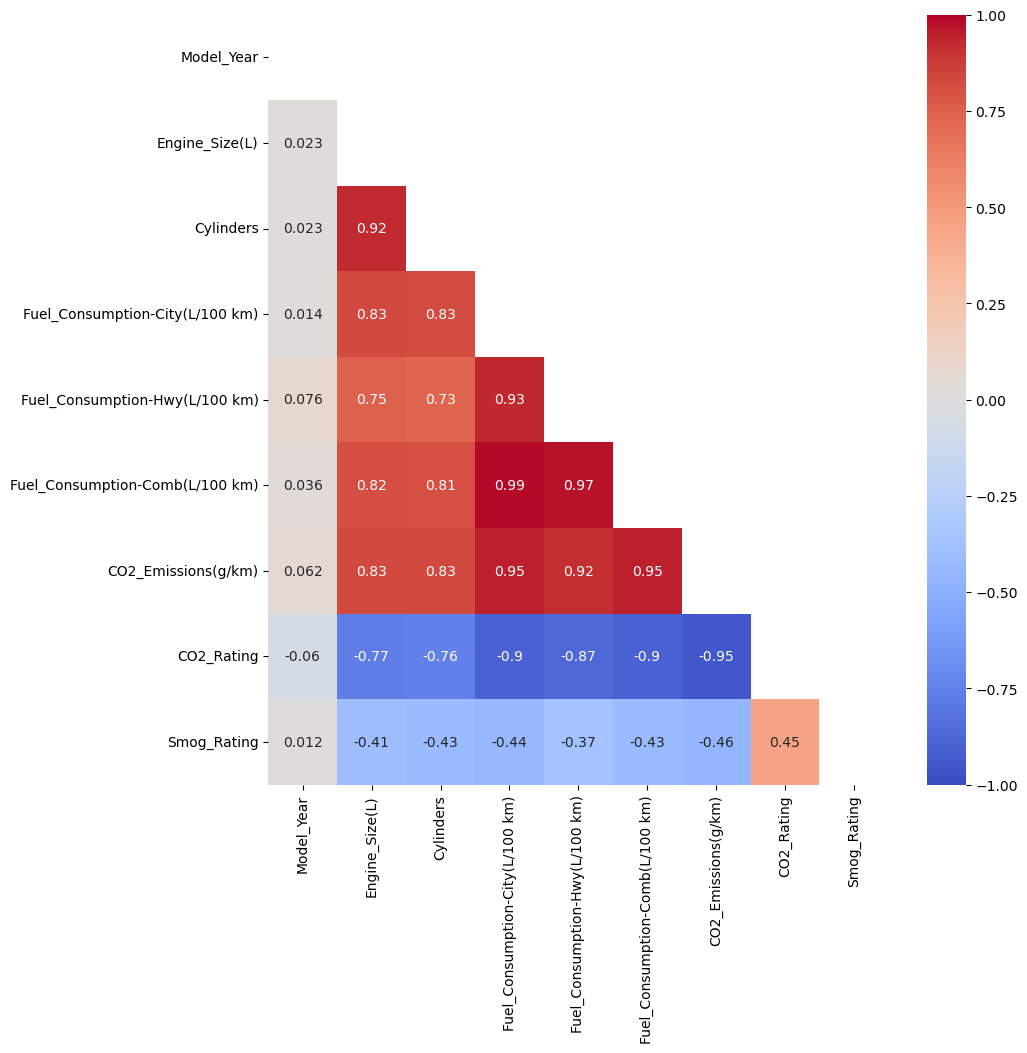

In [244]:
# caclculate all the correlations between each independent variable
corr_df = fuel_cons_rating.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.round(5), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.show()

### Result
based on the correlations, for the purposes of the machine learning model, I will drop Fuel COncumption by Hwy and City columns because Fuel Consumption Combined is same as those 2 columns separately. A negative correlation between CO2 rating and CO2 emissions makes sense because lower CO2 ratings means higher CO2 emissions. Also, I will also remove CO2 rating column for the machine learning model because it conveys same info as CO2_emissions column. I'll need to think on whether to keep both cylinders and engine size or keep one of them. They are similar in nature, but still convey slightly different information. 

## Adding Price Data to my data frame for fuel consumption ratings

In [245]:
#pd.read_csv(file_path, header=None, skiprows=[0, 1], encoding='iso-8859-1', usecols=range(15))
carpricedataset_usd = pd.read_csv("carpricedataset_usd.csv")
canada_car_sale = pd.read_csv("canada_car_sale.csv")
carpricedataset_usd.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category Leather interior Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels   Doors             Wheel   Color  Airbags
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep              Yes    Hybrid           3.5  186005 km        6.0     Automatic          4x4  04-May        Left wheel  Silver       12
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep               No    Petrol             3  192000 km        6.0     Tiptronic          4x4  04-May        Left wheel   Black        8
2  45774419   8467     -        HONDA      FIT        2006  Hatchback               No    Petrol           1.3  200000 km        4.0      Variator        Front  04-May  Right-hand drive   Black        2
3  45769185   3607   862         FORD   Escape        2011       Jeep              Yes    Hybrid           2.5  168966 km        4.0     Automatic          4x4  04-May        Left wheel   White        0
4  45809263  11726   446        HONDA      FIT        2014  Hatchback              Yes    Petrol           1.3   91901 km        4.0     Automatic        Front  04-May        Left wheel  Silver        4

In [246]:
canada_car_sale.head()

Unnamed: 0                   Name  Production Year                                             Price          Color         Type
0           0        2005 Toyota MR2             2005  $18,900                            \n+ tax & lic            Red  Convertible
1           1            2007 BMW M6             2007  $49,995                            \n+ tax & lic          Black  Convertible
2           2     2023 Jeep Wrangler             2023  $64,714                            \n+ tax & lic  Silver Zynith  Convertible
3           3  2019 Mazda Miata MX-5             2019  $38,888                            \n+ tax & lic          White  Convertible
4           4       2022 Ford Bronco             2022  $75,178                            \n+ tax & lic   SHADOW BLACK  Convertible

In [247]:
print("carpricedataset_usd: ",carpricedataset_usd.shape,"\ncanada_car_sale: ",canada_car_sale.shape)

carpricedataset_usd:  (19237, 18) 
canada_car_sale:  (50617, 6)


In [248]:
print(carpricedataset_usd.info(),canada_car_sale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Since for both datasets non null values matches number of total rows therefore there are no missing values in this data and i dont need to do .isna().sum() on the dataset.

In [249]:
print("carpricedataset_usd: ",carpricedataset_usd.duplicated().sum(),"\ncanada_car_sale: ",canada_car_sale.duplicated().sum())

carpricedataset_usd:  313 
canada_car_sale:  0


In [250]:
carpricedataset_usd[carpricedataset_usd.duplicated()].head()



ID  Price Levy   Manufacturer    Model  Prod. year   Category Leather interior Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels   Doors             Wheel   Color  Airbags
425   45815372   7840    -  MERCEDES-BENZ    E 200        1998      Sedan               No       CNG             2  180003 km        4.0        Manual         Rear  04-May        Left wheel   Black        4
1581  45815363   8781    -         TOYOTA      Ist        2002  Hatchback               No    Petrol           1.5  117000 km        4.0     Automatic          4x4  04-May  Right-hand drive     Red        4
1697  45732125  18503    -         TOYOTA    Prius        2010      Sedan               No    Petrol           1.8  162000 km        4.0     Automatic        Front  04-May        Left wheel    Grey       12
1972  45507765  20385    -  MERCEDES-BENZ  CLS 500        2005      Sedan              Yes    Petrol             5  230000 km        8.0     Tiptronic         Rear  04-May        Left wheel  Silver       10
2131  45815363   8781    -         TOYOTA      Ist        2002  Hatchback               No    Petrol           1.5  117000 km        4.0     Automatic          4x4  04-May  Right-hand drive     Red        4

In [251]:
#dropping the duplicate rows
carpricedataset_usd = carpricedataset_usd.drop_duplicates()
#sanity check
carpricedataset_usd.duplicated().sum()

0

In [252]:
#Since my fuel consumption dataset contains data for 2017 and beyond i want to filter this as such
filtered_carpricedataset_usd = carpricedataset_usd[carpricedataset_usd['Prod. year'] >= 2017]
filtered_carpricedataset_usd.head()

ID  Price  Levy   Manufacturer        Model  Prod. year Category Leather interior Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels   Doors       Wheel  Color  Airbags
15  45465200    549  1079         TOYOTA          CHR        2018     Jeep              Yes    Petrol             2   74146 km        4.0     Automatic        Front  04-May  Left wheel  White       12
22  45751951  17562  1249         TOYOTA        Camry        2017    Sedan              Yes    Petrol           2.5   39709 km        4.0     Automatic        Front  04-May  Left wheel  Black       12
36  45369569  51746  1077         TOYOTA  CHR Limited        2019     Jeep               No    Petrol             2   10200 km        4.0     Tiptronic        Front  04-May  Left wheel    Red       12
47  45732544  55390  1017        HYUNDAI     Santa FE        2017     Jeep              Yes    Diesel             2  100734 km        4.0     Automatic        Front  04-May  Left wheel  Black        4
53  45769316    392  1017  MERCEDES-BENZ        E 300        2017    Sedan              Yes    Petrol             2    1600 km        4.0     Automatic         Rear  04-May  Left wheel  Black       12

In [253]:
#in my fuel_cons_rating dataset i make Make and Model in caps lock
#need to ensure the same for this dataset so imporitng prices can be done easily
filtered_carpricedataset_usd['Model'] = filtered_carpricedataset_usd['Model'].str.upper()
filtered_carpricedataset_usd['Manufacturer'] = filtered_carpricedataset_usd['Manufacturer'].str.upper()
filtered_carpricedataset_usd.head()

C:\Users\Sundus Yawar\AppData\Local\Temp\ipykernel_30752\1678663908.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sundus Yawar\AppData\Local\Temp\ipykernel_30752\1678663908.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  Price  Levy   Manufacturer        Model  Prod. year Category Leather interior Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels   Doors       Wheel  Color  Airbags
15  45465200    549  1079         TOYOTA          CHR        2018     Jeep              Yes    Petrol             2   74146 km        4.0     Automatic        Front  04-May  Left wheel  White       12
22  45751951  17562  1249         TOYOTA        CAMRY        2017    Sedan              Yes    Petrol           2.5   39709 km        4.0     Automatic        Front  04-May  Left wheel  Black       12
36  45369569  51746  1077         TOYOTA  CHR LIMITED        2019     Jeep               No    Petrol             2   10200 km        4.0     Tiptronic        Front  04-May  Left wheel    Red       12
47  45732544  55390  1017        HYUNDAI     SANTA FE        2017     Jeep              Yes    Diesel             2  100734 km        4.0     Automatic        Front  04-May  Left wheel  Black        4
53  45769316    392  1017  MERCEDES-BENZ        E 300        2017    Sedan              Yes    Petrol             2    1600 km        4.0     Automatic         Rear  04-May  Left wheel  Black       12

In [254]:
#Trying to figure out why price is less than 10000 for a car, dataset is from 2 years ago 
#but i car bought in 2017 and sold within 4 years shouldn't cost so less
filtered_carpricedataset_usd[filtered_carpricedataset_usd['Price'] <= 10000]

ID  Price  Levy   Manufacturer    Model  Prod. year Category Leather interior Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels   Doors             Wheel  Color  Airbags
15     45465200    549  1079         TOYOTA      CHR        2018     Jeep              Yes    Petrol             2   74146 km        4.0     Automatic        Front  04-May        Left wheel  White       12
53     45769316    392  1017  MERCEDES-BENZ    E 300        2017    Sedan              Yes    Petrol             2    1600 km        4.0     Automatic         Rear  04-May        Left wheel  Black       12
81     45757322   7527   830         TOYOTA    YARIS        2019    Sedan              Yes    Petrol           1.5   27656 km        4.0     Automatic        Front  04-May        Left wheel  White       12
170    45765057    470  1077          MAZDA     1000        2019     Jeep              Yes    Petrol             2   11566 km        4.0     Automatic          4x4  04-May        Left wheel  Black       12
171    45782173   1300     -           AUDI       50        2018    Coupe              Yes    Petrol           0.5    4000 km        1.0     Tiptronic         Rear      >5  Right-hand drive   Blue        0
...         ...    ...   ...            ...      ...         ...      ...              ...       ...           ...        ...        ...           ...          ...     ...               ...    ...      ...
19156  45765253    470   738           FIAT      500        2017     Jeep              Yes    Petrol           1.4   70941 km        4.0     Automatic        Front  04-May        Left wheel  Green       12
19157  45762367   3607  1077            KIA   AVELLA        2019    Sedan              Yes    Petrol             2   23474 km        4.0     Automatic        Front  04-May        Left wheel   Blue       12
19182  45648824   9722   609         TOYOTA    CAMRY        2018    Sedan              Yes    Hybrid           2.5  127515 km        4.0     Automatic        Front  04-May        Left wheel  Black       12
19196  45815892   7997  1079        HYUNDAI  ELANTRA        2018    Sedan              Yes    Petrol             2   21090 km        4.0     Automatic        Front  04-May        Left wheel    Red       12
19215  45763841    470   831        HYUNDAI  ELANTRA        2017    Sedan              Yes    Petrol           1.6   25635 km        4.0     Automatic        Front  04-May        Left wheel  Black       12

[576 rows x 18 columns]

FOr some of the cars at lower prices it makes sense because their mileage is a lot and some are missing airbags so it makes sense. However, for others it doesn't make much sense. So, I'll filter where mileage is less as well.


In [255]:
filtered_carpricedataset_usd['Mileage'] = filtered_carpricedataset_usd['Mileage'].str.replace('km', '').astype(int)
filtered_carpricedataset_usd[(filtered_carpricedataset_usd['Price'] <= 10000) & (filtered_carpricedataset_usd['Mileage'] <= 10000)]

C:\Users\Sundus Yawar\AppData\Local\Temp\ipykernel_30752\3301701233.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  Price  Levy   Manufacturer               Model  Prod. year Category Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels   Doors             Wheel  Color  Airbags
53     45769316    392  1017  MERCEDES-BENZ               E 300        2017    Sedan              Yes    Petrol             2     1600        4.0     Automatic         Rear  04-May        Left wheel  Black       12
171    45782173   1300     -           AUDI                  50        2018    Coupe              Yes    Petrol           0.5     4000        1.0     Tiptronic         Rear      >5  Right-hand drive   Blue        0
264    45771073    392  1017  MERCEDES-BENZ               E 300        2017    Sedan              Yes    Petrol             2     1600        4.0     Automatic         Rear  04-May        Left wheel  Black       12
481    40489113    300     -         TOYOTA  LAND CRUISER PRADO        2019     Jeep              Yes    Petrol           2.7      120        4.0     Automatic          4x4  04-May        Left wheel  White       10
934    45647833   3450   607         TOYOTA               CAMRY        2019    Sedan              Yes    Hybrid           2.5     9626        4.0     Automatic        Front  04-May        Left wheel  Black       12
...         ...    ...   ...            ...                 ...         ...      ...              ...       ...           ...      ...        ...           ...          ...     ...               ...    ...      ...
18366  45655276    706   420            KIA                NIRO        2019    Sedan              Yes    Hybrid           1.6     2942        4.0     Automatic        Front  04-May        Left wheel    Red       12
18577  45648025   3450   607         TOYOTA               CAMRY        2019    Sedan              Yes    Hybrid           2.5     9626        4.0     Automatic        Front  04-May        Left wheel  Black       12
18747  45523830    282  1077         TOYOTA                 CHR        2019     Jeep              Yes    Petrol             2     3237        4.0     Automatic        Front  04-May        Left wheel  Black       12
18762  45648815   3450   607         TOYOTA               CAMRY        2019    Sedan              Yes    Hybrid           2.5     9626        4.0     Automatic        Front  04-May        Left wheel  Black       12
19120  45771780   7213  1077         SUBARU           CROSSTREK        2019    Sedan              Yes    Petrol             2     6384        4.0     Automatic          4x4  04-May        Left wheel   Blue       12

[92 rows x 18 columns]

This data doesn't make much of a sense. Therefore, I am removing any price less than 10,000 USD. There could be special circumstances due to which it is that low, I mean even with high mileage price in 1000s doesn't make sense. It could be data entry error too.

In [256]:
# I chose $7000 for price and 40000 for mileage because if it is a basic car with that much mileage then it makes sense
# for the price to be low but if price is that low and mileage is not that much then it makes no sense for the price to be
# this low.
filtered_carpricedataset_usd = filtered_carpricedataset_usd[(filtered_carpricedataset_usd['Price']>=7000) & (filtered_carpricedataset_usd['Mileage']>=40000)]
filtered_carpricedataset_usd

ID  Price  Levy   Manufacturer     Model  Prod. year   Category Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels   Doors       Wheel   Color  Airbags
47     45732544  55390  1017        HYUNDAI  SANTA FE        2017       Jeep              Yes    Diesel             2   100734        4.0     Automatic        Front  04-May  Left wheel   Black        4
72     45797480  43952  1249        HYUNDAI        H1        2017  Universal              Yes    Diesel           2.5   111643        4.0     Automatic        Front  04-May  Left wheel    Grey        4
111    45808992  85553  1156           FORD  EXPLORER        2017       Jeep              Yes    Petrol           2.3   100567        4.0     Automatic        Front  04-May  Left wheel   Black        4
140    45770233  22580  1017  MERCEDES-BENZ     E 300        2017      Sedan              Yes    Petrol             2    50930        4.0     Automatic         Rear  04-May  Left wheel   Black       12
232    45804644  54518   831        HYUNDAI    TUCSON        2017       Jeep              Yes    Petrol           1.6    40193        4.0     Automatic        Front  04-May  Left wheel   Black        4
...         ...    ...   ...            ...       ...         ...        ...              ...       ...           ...      ...        ...           ...          ...     ...         ...     ...      ...
19138  45796059  15681   738      CHEVROLET     CRUZE        2017      Sedan              Yes    Petrol           1.4   107637        4.0     Automatic        Front  04-May  Left wheel   Black        0
19144  45733642  56814  1017        HYUNDAI    SONATA        2017      Sedan              Yes    Petrol             2    67365        4.0     Automatic        Front  04-May  Left wheel   Black        4
19152  45805163  38229   877        HYUNDAI    TUCSON        2017       Jeep              Yes    Diesel           1.7    71991        4.0     Automatic        Front  04-May  Left wheel  Silver        4
19182  45648824   9722   609         TOYOTA     CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May  Left wheel   Black       12
19188  45571892  61154   579         TOYOTA     RAV 4        2017       Jeep               No    Hybrid           2.5    71234        4.0     Tiptronic          4x4  04-May  Left wheel   White       12

[601 rows x 18 columns]

In [257]:
#Just a sanity check to see if lower prices make reasonable sense (looking at Mileage it does)
filtered_carpricedataset_usd[filtered_carpricedataset_usd['Price']<=10000]

ID  Price  Levy   Manufacturer       Model  Prod. year   Category Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels   Doors             Wheel   Color  Airbags
566    45768672   9565   784          HONDA       CIVIC        2017      Sedan              Yes    Petrol           1.5    58282        4.0     Automatic        Front  04-May        Left wheel   White       12
795    45809279   7213  1946         NISSAN    FRONTIER        2017      Sedan              Yes    Petrol             4    81757        6.0     Automatic         Rear  04-May        Left wheel     Red       12
817    45751858   9565   924          HONDA        HR-V        2017       Jeep              Yes    Petrol           1.8    94339        4.0     Automatic          4x4  04-May        Left wheel   White       12
1470   45806734   9095  2736       DAIHATSU      TERIOS        2017      Sedan              Yes    Petrol           5.7    55765        8.0     Automatic         Rear  04-May        Left wheel   White       12
1493   45813853   7056   481           FORD      FUSION        2017      Sedan              Yes    Hybrid             2   112862        4.0     Automatic        Front  04-May        Left wheel    Blue       12
2394   45646695   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
2606   45760640   8467  1249         SUBARU    FORESTER        2017       Jeep              Yes    Petrol           2.5   289714        4.0     Automatic          4x4  04-May        Left wheel    Blue        0
2695   45645729   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
2791   45756369   8781  1275        HYUNDAI    SANTA FE        2019      Sedan              Yes    Petrol           2.4    46264        4.0     Automatic        Front  02-Mar        Left wheel    Grey       12
3352   45641230   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
4146   45814860   7056  1249         TOYOTA       RAV 4        2017       Jeep              Yes    Petrol           2.5    47301        4.0     Automatic        Front  04-May        Left wheel     Red       12
4501   45648285   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
4721   45767025   8154  1156           FORD    EXPLORER        2017       Jeep              Yes    Petrol           2.3    87688        4.0     Automatic        Front  04-May        Left wheel    Grey       12
5224   45642369   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
5748   45641734   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
6600   45806415   9879   831            GMC     TERRAIN        2018      Sedan              Yes    Petrol           1.5    51050        4.0     Automatic        Front  04-May        Left wheel    Blue       12
8389   45728320   7213   481        HYUNDAI      SONATA        2017      Sedan              Yes    Hybrid             2   138459        4.0     Automatic        Front  04-May        Left wheel  Silver        0
8622   45642847   9722   609         TOYOTA       CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May        Left wheel   Black       12
9186   45773223   9565 

Now i'll convert price in usd to cdn based on exchange rate from 2 years ago  
I got exchange rate average from this webstie from 2 years ago: https://www.exchangerates.org.uk/USD-CAD-spot-exchange-rates-history-2021.html  
1 USD = 1.2538 CAD

In [258]:
filtered_carpricedataset_cdn = filtered_carpricedataset_usd.copy()
filtered_carpricedataset_cdn['Price'] = filtered_carpricedataset_usd['Price']*1.2538
filtered_carpricedataset_cdn

ID        Price  Levy   Manufacturer     Model  Prod. year   Category Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels   Doors       Wheel   Color  Airbags
47     45732544   69447.9820  1017        HYUNDAI  SANTA FE        2017       Jeep              Yes    Diesel             2   100734        4.0     Automatic        Front  04-May  Left wheel   Black        4
72     45797480   55107.0176  1249        HYUNDAI        H1        2017  Universal              Yes    Diesel           2.5   111643        4.0     Automatic        Front  04-May  Left wheel    Grey        4
111    45808992  107266.3514  1156           FORD  EXPLORER        2017       Jeep              Yes    Petrol           2.3   100567        4.0     Automatic        Front  04-May  Left wheel   Black        4
140    45770233   28310.8040  1017  MERCEDES-BENZ     E 300        2017      Sedan              Yes    Petrol             2    50930        4.0     Automatic         Rear  04-May  Left wheel   Black       12
232    45804644   68354.6684   831        HYUNDAI    TUCSON        2017       Jeep              Yes    Petrol           1.6    40193        4.0     Automatic        Front  04-May  Left wheel   Black        4
...         ...          ...   ...            ...       ...         ...        ...              ...       ...           ...      ...        ...           ...          ...     ...         ...     ...      ...
19138  45796059   19660.8378   738      CHEVROLET     CRUZE        2017      Sedan              Yes    Petrol           1.4   107637        4.0     Automatic        Front  04-May  Left wheel   Black        0
19144  45733642   71233.3932  1017        HYUNDAI    SONATA        2017      Sedan              Yes    Petrol             2    67365        4.0     Automatic        Front  04-May  Left wheel   Black        4
19152  45805163   47931.5202   877        HYUNDAI    TUCSON        2017       Jeep              Yes    Diesel           1.7    71991        4.0     Automatic        Front  04-May  Left wheel  Silver        4
19182  45648824   12189.4436   609         TOYOTA     CAMRY        2018      Sedan              Yes    Hybrid           2.5   127515        4.0     Automatic        Front  04-May  Left wheel   Black       12
19188  45571892   76674.8852   579         TOYOTA     RAV 4        2017       Jeep               No    Hybrid           2.5    71234        4.0     Tiptronic          4x4  04-May  Left wheel   White       12

[601 rows x 18 columns]

In [259]:
#Since the car prices can be repeated as it is for different mileages
#I will do the following grouping and take average so that i can import the prices values to my fuel_cons_rating dataset
grouped_df_carPriceDataset = filtered_carpricedataset_usd.groupby(['Manufacturer', 'Model', 'Prod. year'])["Price"].mean().reset_index()
grouped_df_carPriceDataset

Manufacturer                Model  Prod. year    Price
0           AUDI                   Q5        2017  47042.0
1           AUDI                   Q7        2017  13328.0
2           AUDI                   Q7        2018  37947.0
3            BMW                  428        2017  26343.0
4            BMW  520 D XDRIVE LUXURY        2017  28000.0
..           ...                  ...         ...      ...
149   VOLKSWAGEN                JETTA        2017  22732.2
150   VOLKSWAGEN              JETTA S        2017  10976.0
151   VOLKSWAGEN               PASSAT        2017  22423.0
152   VOLKSWAGEN        PASSAT RLAINI        2018  36065.0
153   VOLKSWAGEN               TIGUAN        2018   9565.0

[154 rows x 4 columns]

In [260]:
# Merge the two DataFrames on the specified columns
# Using inner join to keep only matching rows
merged_df = fuel_cons_rating.merge(
    grouped_df_carPriceDataset,
    left_on=['Make', 'Model', 'Model_Year'],
    right_on=['Manufacturer', 'Model', 'Prod. year'],
    how='inner'  
)

# Get the count of matching rows
print("number of matching rows: ",len(merged_df))

number of matching rows:  115


In [261]:
fuel_cons_rating_with_price = fuel_cons_rating.merge(grouped_df_carPriceDataset[['Manufacturer', 'Model', 'Prod. year', 'Price']], 
                      left_on=['Make', 'Model', 'Model_Year'],  # Use 'left_on'
                      right_on=['Manufacturer', 'Model', 'Prod. year'],  # Use 'right_on'
                      how='left')



fuel_cons_rating_with_price

Model_Year     Make               Model Vehicle_Class  Engine_Size(L)  Cylinders Transmission Fuel_Type  Fuel_Consumption-City(L/100 km)  Fuel_Consumption-Hwy(L/100 km)  Fuel_Consumption-Comb(L/100 km)  CO2_Emissions(g/km)  CO2_Rating  Smog_Rating Manufacturer  Prod. year  Price
0           2022  HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6          4          AM6         X                              4.0                             3.9                              4.0                   94          10            7          NaN         NaN    NaN
1           2021  HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6          4          AM6         X                              4.0                             3.9                              4.0                   94          10            7          NaN         NaN    NaN
2           2019  HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6          4          AM6         X                              4.2                             4.0                              4.1                   96          10            7          NaN         NaN    NaN
3           2018  HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6          4          AM6         X                              4.2                             4.0                              4.1                   96          10            7          NaN         NaN    NaN
4           2017  HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6          4          AM6         X                              4.2                             4.0                              4.1                   96          10            8          NaN         NaN    NaN
...          ...      ...                 ...           ...             ...        ...          ...       ...                              ...                             ...                              ...                  ...         ...          ...          ...         ...    ...
6946        2022  BUGATTI    CHIRON PUR SPORT    TWO-SEATER             8.0         16          AM7         Z                             30.3                            20.9                             26.1                  608           1            1          NaN         NaN    NaN
6947        2022  BUGATTI  CHIRON SUPER SPORT    TWO-SEATER             8.0         16          AM7         Z                             30.3                            20.9                             26.1                  608           1            1          NaN         NaN    NaN
6948        2023  BUGATTI  CHIRON SUPER SPORT    TWO-SEATER             8.0         16          AM7         Z                             30.3                            20.9                             26.1                  608           1            1          NaN         NaN    NaN
6949        2023  BUGATTI    CHIRON PUR SPORT    TWO-SEATER             8.0         16          AM7         Z                             30.3                            20.9                             26.1                  608           1            1          NaN         NaN    NaN
6950        2021  BUGATTI    CHIRON PUR SPORT    TWO-SEATER             8.0         16          AM7         Z                             30.3                            20.9                             26.1                  608           1            1          NaN         NaN    NaN

[6951 rows x 17 columns]

In [262]:
#it added prod year and manufacturer columns too so i'll remove that
fuel_cons_rating_with_price.drop(['Manufacturer','Prod. year'], axis=1, inplace=True)

In [263]:
#Just checking if it worked
fuel_cons_rating_with_price[fuel_cons_rating_with_price['Price'].notna()]


Model_Year           Make       Model            Vehicle_Class  Engine_Size(L)  Cylinders Transmission Fuel_Type  Fuel_Consumption-City(L/100 km)  Fuel_Consumption-Hwy(L/100 km)  Fuel_Consumption-Comb(L/100 km)  CO2_Emissions(g/km)  CO2_Rating  Smog_Rating     Price
16          2017         TOYOTA       PRIUS                 MID-SIZE             1.8          4           AV         X                              4.4                             4.6                              4.5                  105          10            8  27597.75
22          2018         TOYOTA       PRIUS                 MID-SIZE             1.8          4           AV         X                              4.3                             4.6                              4.5                  105          10            7  15210.00
36          2018            KIA        NIRO    STATION WAGON - SMALL             1.6          4          AM6         X                              4.6                             5.1                              4.8                  114          10            7  38888.00
39          2017            KIA        NIRO    STATION WAGON - SMALL             1.6          4          AM6         X                              4.6                             5.1                              4.8                  114          10            8  37633.00
68          2017         TOYOTA     PRIUS C                  COMPACT             1.5          4           AV         X                              4.9                             5.5                              5.1                  120          10            8  25089.00
...          ...            ...         ...                      ...             ...        ...          ...       ...                              ...                             ...                              ...                  ...         ...          ...       ...
5979        2017          DODGE  CHALLENGER                 MID-SIZE             6.4          8           M6         Z                             16.7                            10.4                             13.9                  325           3            5  11604.00
6113        2017         TOYOTA      TUNDRA  PICKUP TRUCK - STANDARD             4.6          8          AS6         X                             15.8                            12.3                             14.2                  334           3            5  25089.00
6263        2017          LEXUS      GX 460           SUV - STANDARD             4.6          8          AS6         Z                             16.0                            12.9                             14.6                  341           2            6  33243.00
6499        2017         TOYOTA      TUNDRA  PICKUP TRUCK - STANDARD             5.7          8          AS6         X                             17.2                            12.9                             15.3                  358           2            5  25089.00
6827        2017  MERCEDES-BENZ       G 550           SUV - STANDARD             4.0          8          AS7         Z                             19.0                            16.6                             17.9                  401           1            5  42965.00

[115 rows x 15 columns]